<a href="https://colab.research.google.com/github/RafsanJany-44/Research-NREM-REM/blob/main/Final_XB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd

dataset=pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Research-NREM-REM/main/dataset/REM_NREM.csv")


target="Sleep_Stage"

classes = np.array(sorted(list(set(dataset[target]))))


In [12]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)

  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
dataset.head()

,Sleep_Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,NREM,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,25.35024,27.47317,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,NREM,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,25.22537,26.97366,...,0.00070,0.99902,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122
2,NREM,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,26.09951,28.47220,...,0.00077,1.49854,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122
3,NREM,0.00050,10.36488,16.60878,15.85951,7.99220,0.00053,15.48488,24.10146,25.72488,...,0.00130,1.87317,6.11902,3.74634,0.37463,0.000070,31.59415,42.83317,49.95122,49.95122
4,NREM,0.00072,9.36585,15.98439,15.48488,7.99220,0.00067,15.11024,22.22829,23.22732,...,0.00123,1.49854,6.61854,3.74634,0.74927,0.000060,29.47122,45.08098,49.95122,49.95122


In [14]:
set(list(dataset[target]))

{'NREM', 'REM'}

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [16]:

set(list(dataset[target]))

{0, 1}

In [17]:
X = dataset.loc[:, dataset.columns!=target]
y = dataset[target]

In [18]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
new_dataset=balance(X_test,y_test)

X_test = new_dataset.loc[:, new_dataset.columns!=target]
y_test = new_dataset[target]

In [20]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators=4010,max_depth=29,random_state=0)
xgb.fit(X_train,y_train)

XGBClassifier(max_depth=29, n_estimators=4010)

In [21]:

y_pred_test = xgb.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))
print("Accurecy: ",accuracy_score(y_test, y_pred_test))

[[14129   331]
 [ 2497 11963]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     14460
           1       0.97      0.83      0.89     14460

    accuracy                           0.90     28920
   macro avg       0.91      0.90      0.90     28920
weighted avg       0.91      0.90      0.90     28920

Accurecy:  0.9022130013831259


In [22]:

y_pred_train = xgb.predict(X_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train,y_pred_train))
print("Accurecy: ",accuracy_score(y_train, y_pred_train))

[[58171     0]
 [  139 12966]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58171
           1       1.00      0.99      0.99     13105

    accuracy                           1.00     71276
   macro avg       1.00      0.99      1.00     71276
weighted avg       1.00      1.00      1.00     71276

Accurecy:  0.9980498344463775


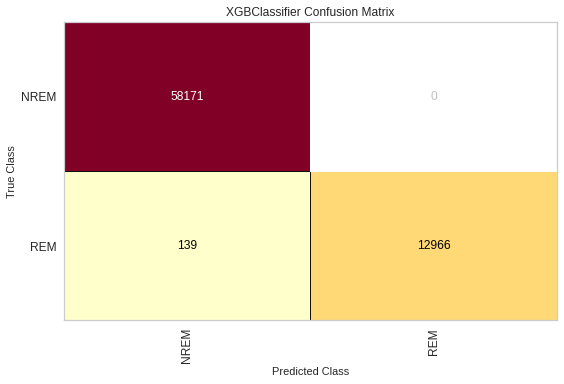

In [24]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(xgb, classes=classes)

cm.fit(X_train, y_train)
cm.score(X_train, y_train)
cm.show()

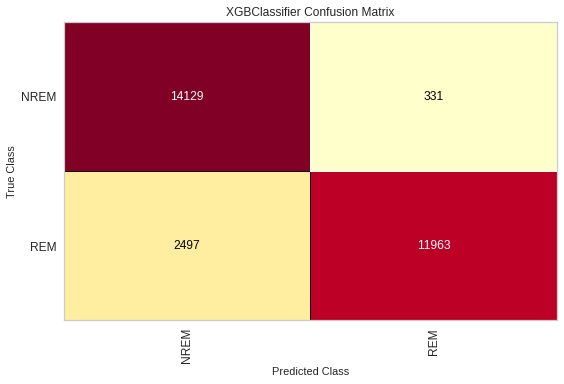

In [25]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(xgb, classes=classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()